In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1661955594101.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,08/30/2022,3986.16,--,4041.25,4044.98,3965.21
1,08/29/2022,4030.61,--,4034.58,4062.99,4017.42
2,08/26/2022,4057.66,--,4198.74,4203.04,4057.66
3,08/25/2022,4199.12,--,4153.26,4200.54,4147.59
4,08/24/2022,4140.77,--,4126.55,4156.56,4119.97
...,...,...,...,...,...,...
2542,09/06/2012,1432.12,--,1403.74,1432.12,1403.74
2543,09/05/2012,1403.44,--,1404.94,1408.81,1401.25
2544,09/04/2012,1404.94,--,1406.54,1409.31,1396.56
2545,09/03/2012,1406.58,--,0.00,0.00,0.00


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2547.000000,2547.000000,2547.000000,2547.000000
mean,2651.322006,2628.315881,2642.029069,2613.398202
std,878.111229,921.522139,927.638026,914.623791
min,1353.330000,0.000000,0.000000,0.000000
25%,2000.005000,1994.360000,2002.830000,1984.685000
50%,2452.510000,2449.160000,2465.020000,2439.030000
75%,3082.290000,3079.645000,3094.030000,3051.180000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2515.000000,2515.000000,2515.000000,2515.000000
mean,2662.178346,2661.757674,2675.645344,2646.650187
std,877.882448,878.044967,884.016131,871.288322
min,1353.330000,1353.360000,1360.620000,1343.350000
25%,2004.620000,2006.110000,2018.975000,1994.015000
50%,2470.300000,2468.060000,2475.010000,2459.400000
75%,3095.335000,3092.585000,3112.190000,3077.430000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2515 non-null   object 
 1   Close/Last  2515 non-null   float64
 2   Volume      2515 non-null   object 
 3   Open        2515 non-null   float64
 4   High        2515 non-null   float64
 5   Low         2515 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.5+ KB


In [5]:
df.shape

(2515, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

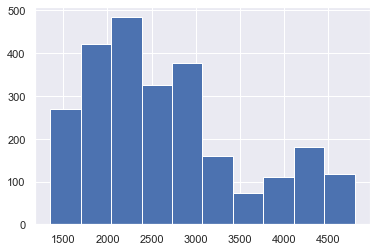

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

3986.16

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2662.178345924463

In [10]:
close_sd = df['Close/Last'].std()
close_sd

877.8824482503045

In [11]:
sigma1 = close_mean + close_sd
sigma1

3540.0607941747676

In [12]:
sigma2 = close_mean + (2 * close_sd)
sigma2

4417.943242425072

In [13]:
sigma3 = close_mean + (3 * close_sd)
sigma3

5295.825690675376

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close/Last  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.9 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2012-08-31 to 2022-08-30')

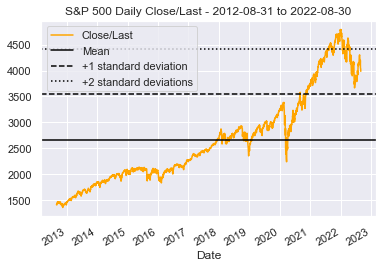

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2012-08-31 to 2022-08-30')

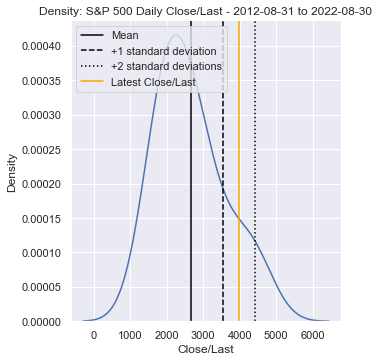

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.5081536904107682